# ds_bootcamp_unit_2.1.8_challenge

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Data

In [2]:
df = pd.read_csv("kc_house_data.csv")

# Choosing outcome variable as "price" and six other variables
# including "waterfront" as a categorical
df = df[["price", "bedrooms", "bathrooms", "floors", "sqft_living", "sqft_lot", "waterfront"]]
print("Rows: {}\nColumns: {}".format(df.shape[0], df.shape[1]))
df.head()

Rows: 21613
Columns: 7


,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,waterfront
0,221900.0,3,1.00,1.0,1180,5650,0
1,538000.0,3,2.25,2.0,2570,7242,0
2,180000.0,2,1.00,1.0,770,10000,0
3,604000.0,4,3.00,1.0,1960,5000,0
4,510000.0,3,2.00,1.0,1680,8080,0


## Univariate exploration

In [17]:
df["price"].describe().apply(lambda x: format(x, ".2f"))

count      21613.00
mean      540088.14
std       367127.20
min        75000.00
25%       321950.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: object

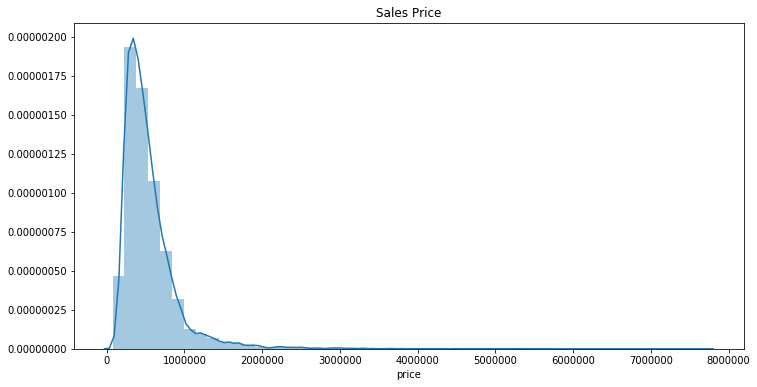

In [4]:
fig = plt.figure(figsize=(12, 6))
g = sns.distplot(df["price"])
plt.title("Sales Price")
plt.show()

In [16]:
df["sqft_living"].describe().apply(lambda x: format(x, ".2f"))

count    21613.00
mean      2079.90
std        918.44
min        290.00
25%       1427.00
50%       1910.00
75%       2550.00
max      13540.00
Name: sqft_living, dtype: object

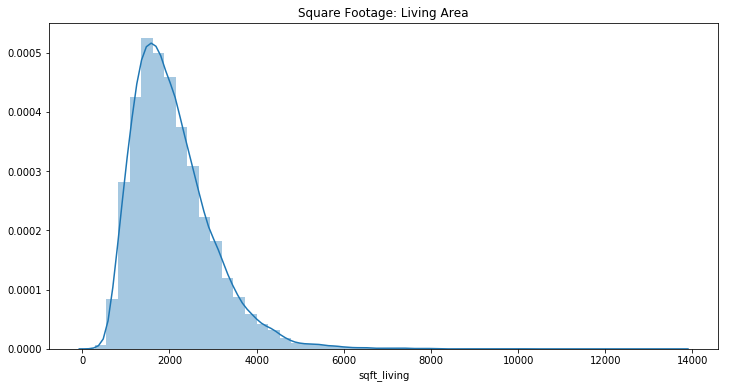

In [6]:
fig = plt.figure(figsize=(12, 6))
g = sns.distplot(df["sqft_living"])
plt.title("Square Footage: Living Area")
plt.show()

In [15]:
df["sqft_lot"].describe().apply(lambda x: format(x, ".2f"))

count      21613.00
mean       15106.97
std        41420.51
min          520.00
25%         5040.00
50%         7618.00
75%        10688.00
max      1651359.00
Name: sqft_lot, dtype: object

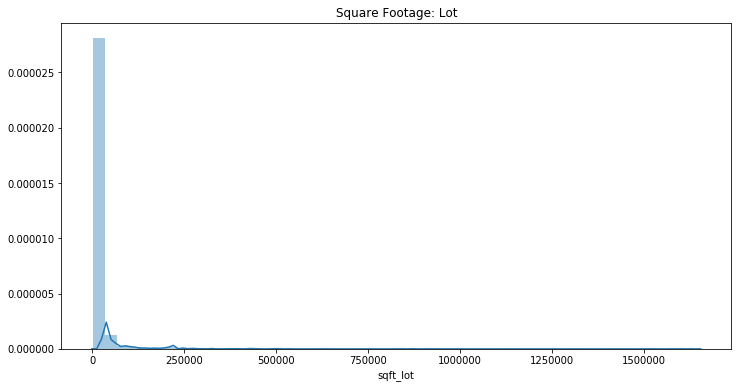

In [8]:
fig = plt.figure(figsize=(12, 6))
g = sns.distplot(df["sqft_lot"])
plt.title("Square Footage: Lot")
plt.show()

In [10]:
# Take a quick peek at that outlier
# Turns out it's a small structure on a massive piece of property
df.loc[df["sqft_lot"] == 1651359, :]

,price,bedrooms,bathrooms,floors,sqft_living,sqft_lot,waterfront
1719,700000.0,4,1.0,1.0,1300,1651359,0


In [14]:
df["bedrooms"].describe().apply(lambda x: format(x, ".2f"))

count    21613.00
mean         3.37
std          0.93
min          0.00
25%          3.00
50%          3.00
75%          4.00
max         33.00
Name: bedrooms, dtype: object

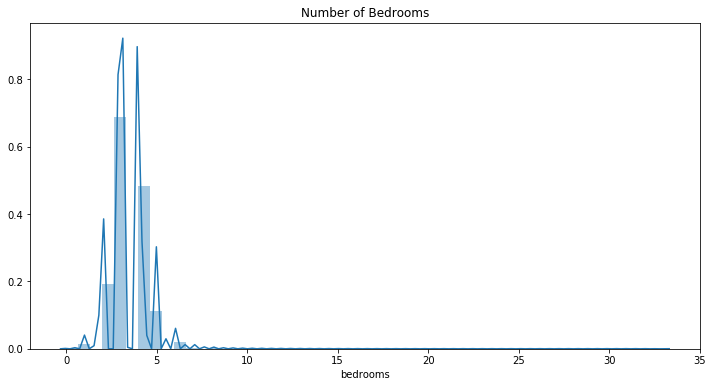

In [12]:
fig = plt.figure(figsize=(12, 6))
g = sns.distplot(df["bedrooms"])
plt.title("Number of Bedrooms")
plt.show()

In [13]:
df["bathrooms"].describe().apply(lambda x: format(x, ".2f"))

count    21613.00
mean         2.11
std          0.77
min          0.00
25%          1.75
50%          2.25
75%          2.50
max          8.00
Name: bathrooms, dtype: object

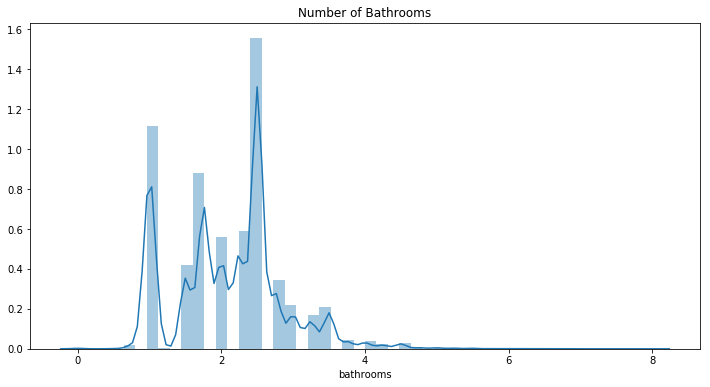

In [18]:
fig = plt.figure(figsize=(12, 6))
g = sns.distplot(df["bathrooms"])
plt.title("Number of Bathrooms")
plt.show()

In [19]:
df["floors"].describe().apply(lambda x: format(x, ".2f"))

count    21613.00
mean         1.49
std          0.54
min          1.00
25%          1.00
50%          1.50
75%          2.00
max          3.50
Name: floors, dtype: object

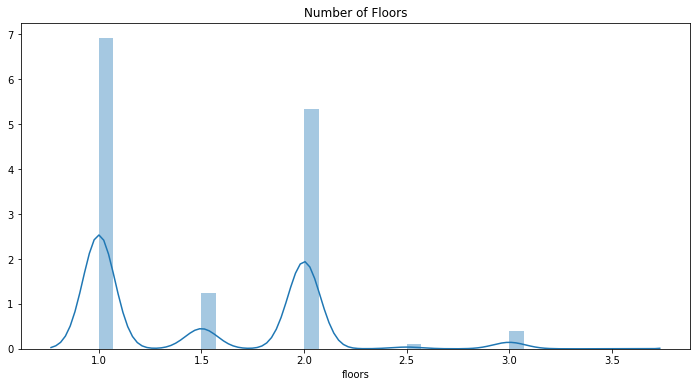

In [20]:
fig = plt.figure(figsize=(12, 6))
g = sns.distplot(df["floors"])
plt.title("Number of Floors")
plt.show()

In [21]:
df["waterfront"].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

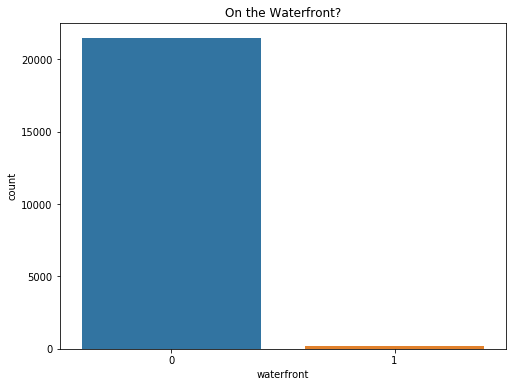

In [22]:
fig = plt.figure(figsize=(8, 6))
sns.countplot(x=df["waterfront"])
plt.title("On the Waterfront?")
plt.show()

## Bivariate exploration

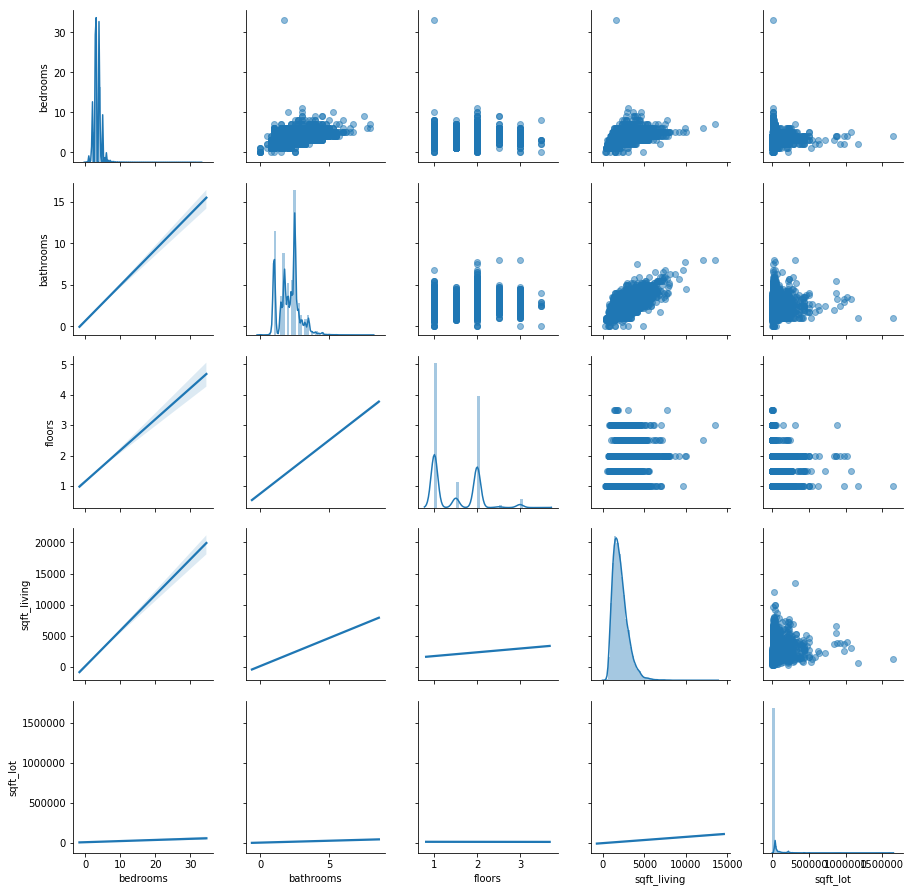

In [23]:
g = sns.PairGrid(df[["bedrooms", "bathrooms", "floors", "sqft_living", "sqft_lot"]], diag_sharey=False)
g.map_upper(plt.scatter, alpha=0.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.distplot)
plt.show()

In [24]:
# Explore correlations among the predicive variables
corrmat = df[["bedrooms", "bathrooms", "floors", "sqft_living", "sqft_lot"]].corr()
print(corrmat)

             bedrooms  bathrooms    floors  sqft_living  sqft_lot
bedrooms     1.000000   0.515884  0.175429     0.576671  0.031703
bathrooms    0.515884   1.000000  0.500653     0.754665  0.087740
floors       0.175429   0.500653  1.000000     0.353949 -0.005201
sqft_living  0.576671   0.754665  0.353949     1.000000  0.172826
sqft_lot     0.031703   0.087740 -0.005201     0.172826  1.000000


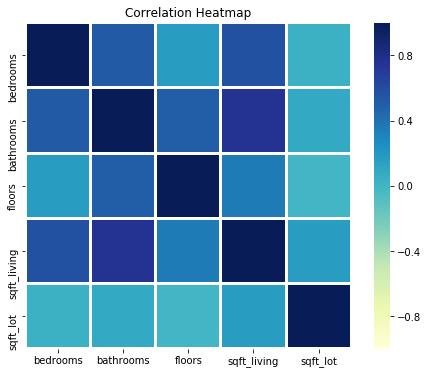

In [25]:
fig = plt.figure(figsize=(8, 6))
sns.heatmap(corrmat, vmax=1, vmin=-1, square=True, cmap="YlGnBu", lw=2)
plt.title("Correlation Heatmap")
plt.show()

### Bivarate with the categorical variable

In [36]:
print(df[["bedrooms", "bathrooms", "floors", "sqft_living", "sqft_lot", "waterfront"]].groupby("waterfront").describe().T)

waterfront                    0              1
bathrooms   count  2.145000e+04     163.000000
            mean   2.110478e+00       2.677914
            std    7.656478e-01       1.092456
            min    0.000000e+00       0.750000
            25%    1.500000e+00       2.000000
            50%    2.250000e+00       2.500000
            75%    2.500000e+00       3.250000
            max    8.000000e+00       6.750000
bedrooms    count  2.145000e+04     163.000000
            mean   3.371375e+00       3.300613
            std    9.288559e-01       1.078035
            min    0.000000e+00       1.000000
            25%    3.000000e+00       3.000000
            50%    3.000000e+00       3.000000
            75%    4.000000e+00       4.000000
            max    3.300000e+01       6.000000
floors      count  2.145000e+04     163.000000
            mean   1.493193e+00       1.641104
            std    5.397400e-01       0.554191
            min    1.000000e+00       1.000000
            2

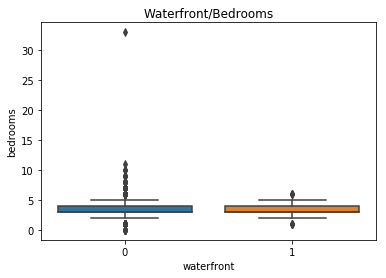

In [27]:
sns.boxplot(x="waterfront", y="bedrooms", data=df)
plt.title("Waterfront/Bedrooms")
plt.show()

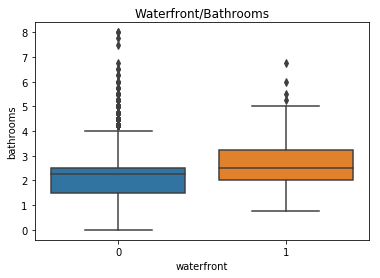

In [28]:
sns.boxplot(x="waterfront", y="bathrooms", data=df)
plt.title("Waterfront/Bathrooms")
plt.show()

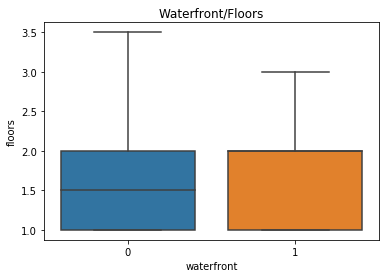

In [29]:
sns.boxplot(x="waterfront", y="floors", data=df)
plt.title("Waterfront/Floors")
plt.show()

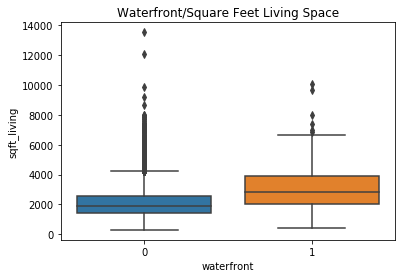

In [30]:
sns.boxplot(x="waterfront", y="sqft_living", data=df)
plt.title("Waterfront/Square Feet Living Space")
plt.show()

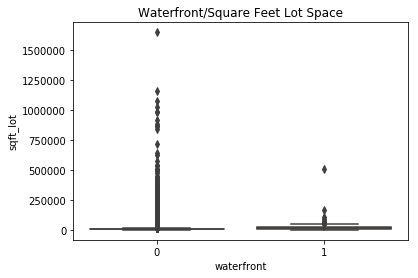

In [31]:
sns.boxplot(x="waterfront", y="sqft_lot", data=df)
plt.title("Waterfront/Square Feet Lot Space")
plt.show()

In [40]:
# Run t-tests by samples with waterfront and without waterfront
# All appear to be significant sans bathrooms
for col in df[["bedrooms", "bathrooms", "floors", "sqft_living", "sqft_lot"]]:
    print(col)
    print(stats.ttest_ind(
        df[df["waterfront"] == 0][col].dropna(),
        df[df["waterfront"] == 1][col].dropna()
    ))

bedrooms
Ttest_indResult(statistic=0.9676901063619425, pvalue=0.3332099898608125)
bathrooms
Ttest_indResult(statistic=-9.389843162110541, pvalue=6.586109704212585e-21)
floors
Ttest_indResult(statistic=-3.484792972201193, pvalue=0.0004934938092824798)
sqft_living
Ttest_indResult(statistic=-15.344843891183366, pvalue=7.288405623756789e-53)
sqft_lot
Ttest_indResult(statistic=-3.1766297855549013, pvalue=0.0014920655855649662)


## Features

In [94]:
# Empty dataframe to hold the features
features = pd.DataFrame()

In [95]:
# Does yard space matter?
features["sqft_yard_space"] = df["sqft_lot"] - df["sqft_living"]
# Maybe just the total number of rooms matters
features["total_rooms"] = df["bedrooms"] + df["bathrooms"]
# Perhaps there's a preference for multi-level homes
# but indifference to how many levels there are in total
features["multi_level"] = np.where((df["floors"] > 1), 1, 0) # Perhaps there's a preference for multi-level homes

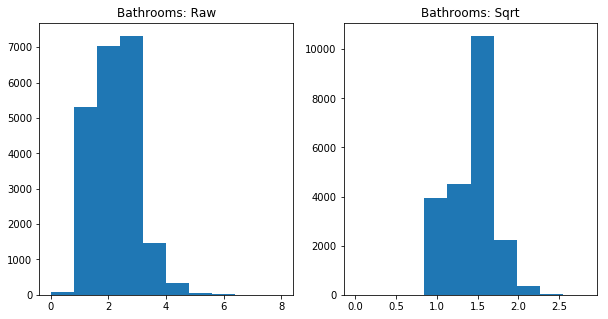

In [96]:
fig = plt.figure(figsize=(10, 5))

fig.add_subplot(121)
plt.hist(df["bathrooms"].dropna())
plt.title("Bathrooms: Raw")

fig.add_subplot(122)
plt.hist(np.sqrt(df["bathrooms"].dropna()))
plt.title("Bathrooms: Sqrt")

plt.show()

In [97]:
# Takeing the sqrt of bathrooms appears "more normal" so we will add it to the features
features["sqrt_bathrooms"] = np.sqrt(df["bathrooms"])

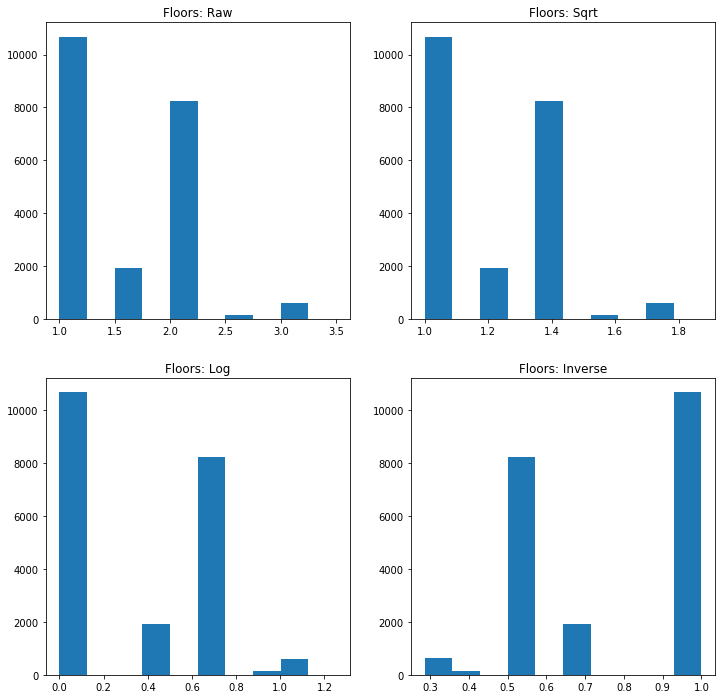

In [98]:
fig = plt.figure(figsize=(12, 12))

fig.add_subplot(221)
plt.hist(df["floors"].dropna())
plt.title("Floors: Raw")

fig.add_subplot(222)
plt.hist(np.sqrt(df["floors"].dropna()))
plt.title("Floors: Sqrt")

fig.add_subplot(223)
plt.hist(np.log(df["floors"].dropna()))
plt.title("Floors: Log")

fig.add_subplot(224)
plt.hist(1 / df["floors"].dropna())
plt.title("Floors: Inverse")

plt.show()

I don't see any justfication for any of these transformations to be added as a feature

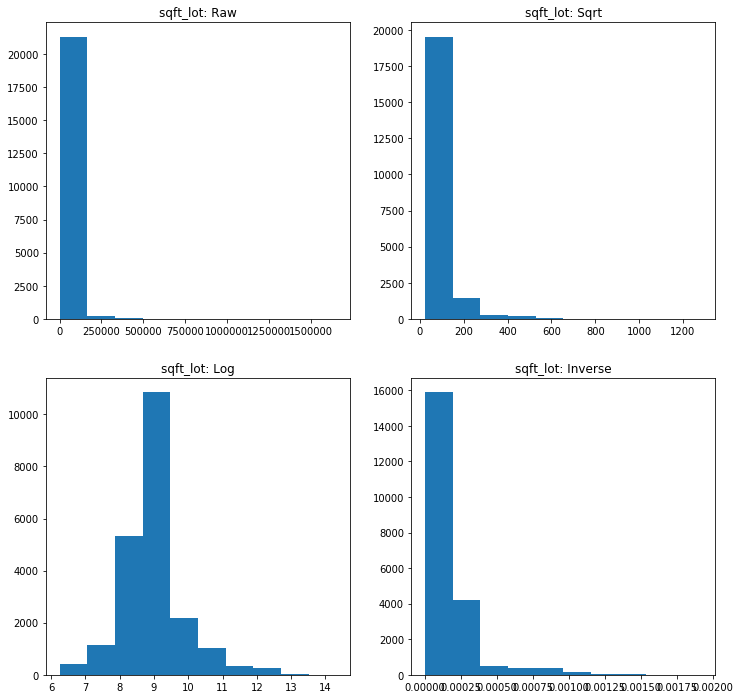

In [99]:
fig = plt.figure(figsize=(12, 12))

fig.add_subplot(221)
plt.hist(df["sqft_lot"].dropna())
plt.title("sqft_lot: Raw")

fig.add_subplot(222)
plt.hist(np.sqrt(df["sqft_lot"].dropna()))
plt.title("sqft_lot: Sqrt")

fig.add_subplot(223)
plt.hist(np.log(df["sqft_lot"].dropna()))
plt.title("sqft_lot: Log")

fig.add_subplot(224)
plt.hist(1 / df["sqft_lot"].dropna())
plt.title("sqft_lot: Inverse")

plt.show()

In [100]:
# The log transformation looks realitvely normal, so feature!
features["log_sqft_lot"] = np.log(df["sqft_lot"])

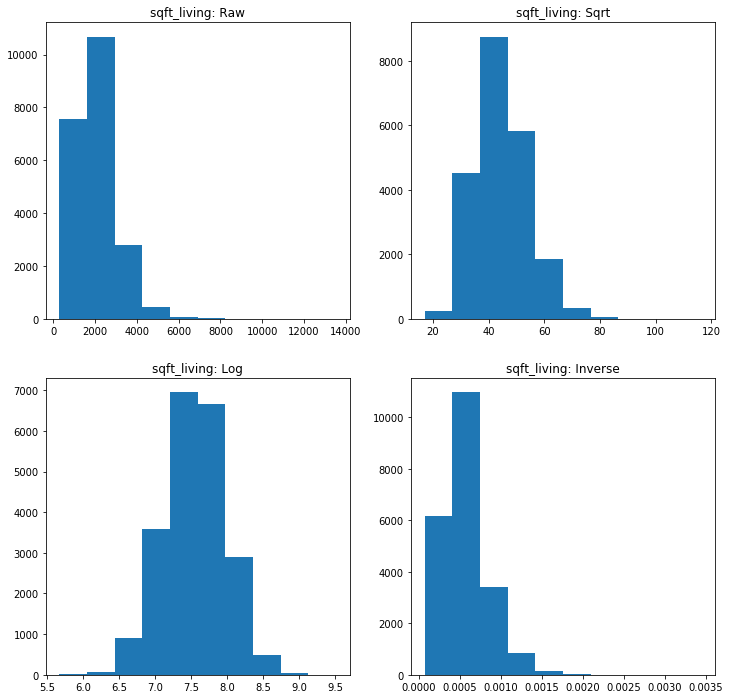

In [101]:
fig = plt.figure(figsize=(12, 12))

fig.add_subplot(221)
plt.hist(df["sqft_living"].dropna())
plt.title("sqft_living: Raw")

fig.add_subplot(222)
plt.hist(np.sqrt(df["sqft_living"].dropna()))
plt.title("sqft_living: Sqrt")

fig.add_subplot(223)
plt.hist(np.log(df["sqft_living"].dropna()))
plt.title("sqft_living: Log")

fig.add_subplot(224)
plt.hist(1 / df["sqft_living"].dropna())
plt.title("sqft_living: Inverse")

plt.show()

In [102]:
# Log and sqrt both look nice...features!
features["log_sqft_living"] = np.log(df["sqft_living"])
features["sqrt_sqft_living"] = np.sqrt(df["sqft_living"])

In [103]:
# Bathrooms and square foot living space are highly correlated
# Let's combine the two
means = df[["bathrooms", "sqft_living"]].mean(axis=0)
stds = df[["bathrooms", "sqft_living"]].std(axis=0)
features["sqfoot_living_bath"] = ((df[["bathrooms", "sqft_living"]] - means) / stds).mean(axis=1)

In [104]:
# Running out of ideas, so I will take the square and cube of lot size
features["sqft_lot_squared"] = df["sqft_lot"] * df["sqft_lot"]
features["sqft_lot_cubed"] = df["sqft_lot"] * df["sqft_lot"] * df["sqft_lot"]

In [105]:
len(features.columns)

10

## Feature Selection

In [106]:
features["price"] = df["price"]
features.corr().loc["price",].sort_values(ascending=False)

price                 1.000000
sqrt_sqft_living      0.661601
sqfoot_living_bath    0.655079
log_sqft_living       0.611704
sqrt_bathrooms        0.489284
total_rooms           0.466319
multi_level           0.263588
log_sqft_lot          0.161318
sqft_yard_space       0.074361
sqft_lot_squared      0.034646
sqft_lot_cubed        0.017706
Name: price, dtype: float64